In [1]:
import numpy as np
import math
import glob
import sys
import sklearn 
import uproot

import matplotlib.pyplot as plt

import PrimaryTierFileHelper_Pandora

In [2]:
###########################################################
# Define mode
###########################################################
isTrackMode = False

In [3]:
###########################################################
# Define file
###########################################################

#file = 'hierarchy_0_1_2'
file = 'hierarchy_0_REDUCED'
fileNames = glob.glob('/Users/isobel/Desktop/DUNE/2024/Hierarchy/files/' + file + '.root')

if (isTrackMode) : 
    trainVarFile = '/Users/isobel/Desktop/DUNE/2024/Hierarchy/files/' + file + '_track.npz'
else :
    trainVarFile = '/Users/isobel/Desktop/DUNE/2024/Hierarchy/files/' + file + '_shower.npz'

print('fileNames:', fileNames)
print('trainVarFile:', trainVarFile)

fileNames: ['/Users/isobel/Desktop/DUNE/2024/Hierarchy/files/hierarchy_0_REDUCED.root']
trainVarFile: /Users/isobel/Desktop/DUNE/2024/Hierarchy/files/hierarchy_0_REDUCED_shower.npz


In [4]:
###########################################################
# Read link tree
###########################################################
#nLinks, variables, y = PrimaryTierFileHelper.readTree(fileNames)

if (isTrackMode) :
    nLinks, variables, y, isTruePrimaryLink, isLinkOrientationCorrect, trainingCutDCA = PrimaryTierFileHelper_Pandora.readTreeGroupLinks_track(fileNames, normalise=True)
else :
    nLinks, variables, y, isTruePrimaryLink, isLinkOrientationCorrect, trainingCutDCA = PrimaryTierFileHelper_Pandora.readTreeGroupLinks_shower(fileNames, normalise=True)

Reading tree:  /Users/isobel/Desktop/DUNE/2024/Hierarchy/files/hierarchy_0_REDUCED.root , This may take a while...
We have  458926  to train on!


In [5]:
###########################################################
# Define some plotting functions
###########################################################

def drawSignalBackground(variable, truth_labels, graph_label) :
    
    signal_mask_vis = (truth_labels == 1).reshape(-1)
    background_mask_vis = (truth_labels == 0).reshape(-1)

    variable_signal = variable[signal_mask_vis].reshape(-1)
    variable_background = variable[background_mask_vis].reshape(-1)

    signal_weights = 1.0 / float(variable_signal.shape[0])
    signal_weights = np.ones(variable_signal.shape[0]) * signal_weights
    
    background_weights = 1.0 / float(variable_background.shape[0])
    background_weights = np.ones(variable_background.shape[0]) * background_weights   
        
    plt.hist(variable_signal, bins=50, color='blue', weights=signal_weights, label='signal', fill=False, histtype='step')
    plt.hist(variable_background, bins=50, color='red', weights=background_weights, label='background', fill=False, histtype='step')
    plt.title(graph_label)
    plt.xlabel(graph_label)
    plt.legend()
    plt.grid(True)
    plt.show()   

def drawSignalBackgroundGroup_track(variable0, variable1, truth_link_orientation, truth_is_correct, graph_label) :
    
    signal_mask_0 = np.logical_and((truth_link_orientation[:,0] == 1), truth_is_correct).reshape(-1)
    signal_mask_1 = np.logical_and((truth_link_orientation[:,1] == 1), truth_is_correct).reshape(-1)
    wo_mask_0 = np.logical_and((truth_link_orientation[:,0] == 0), truth_is_correct).reshape(-1)
    wo_mask_1 = np.logical_and((truth_link_orientation[:,1] == 0), truth_is_correct).reshape(-1)
    background_mask = (truth_is_correct == 0).reshape(-1)
    
    variable_signal_0 = variable0[signal_mask_0].reshape(-1)
    variable_signal_1 = variable1[signal_mask_1].reshape(-1)
    variable_wo_0 = variable0[wo_mask_0].reshape(-1)
    variable_wo_1 = variable1[wo_mask_1].reshape(-1)
    variable_background_0 = variable0[background_mask].reshape(-1)
    variable_background_1 = variable0[background_mask].reshape(-1)
    
    variable_signal = np.concatenate((variable_signal_0, variable_signal_1))
    variable_wo = np.concatenate((variable_wo_0, variable_wo_1))
    variable_background = np.concatenate((variable_background_0, variable_background_1))
    
    #variable_signal = variable_signal[variable_signal > -9000]
    #variable_wo = variable_wo[variable_wo > -9000]
    #variable_background = variable_background[variable_background > -9000]
    
    signal_weights = 1.0 / float(variable_signal.shape[0])
    signal_weights = np.ones(variable_signal.shape[0]) * signal_weights
    
    wo_weights = 1.0 / float(variable_wo.shape[0])
    wo_weights = np.ones(variable_wo.shape[0]) * wo_weights
    
    background_weights = 1.0 / float(variable_background.shape[0])
    background_weights = np.ones(variable_background.shape[0]) * background_weights  
        
    plt.hist(variable_signal, bins=50, color='blue', weights=signal_weights, label='signal', fill=False, histtype='step')
    plt.hist(variable_wo, bins=50, color='orange', weights=wo_weights, label='wrong orientation', fill=False, histtype='step')
    plt.hist(variable_background, bins=50, color='red', weights=background_weights, label='background', fill=False, histtype='step')
    plt.title(graph_label)
    plt.xlabel(graph_label)
    plt.legend()
    plt.grid(True)
    plt.show()   

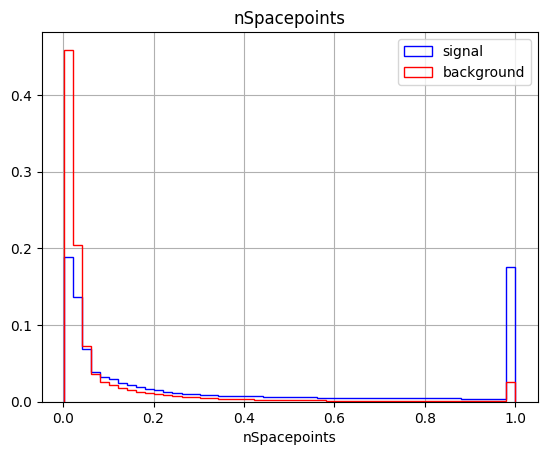

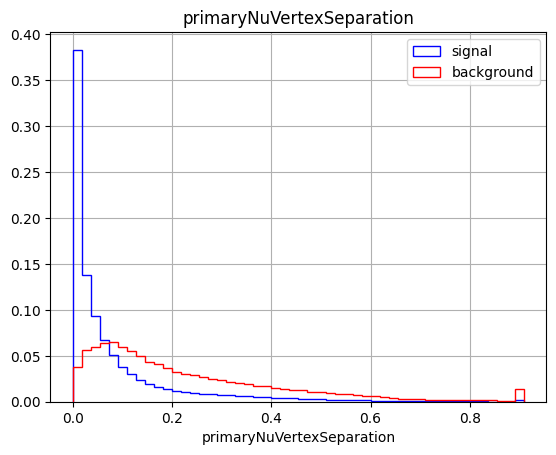

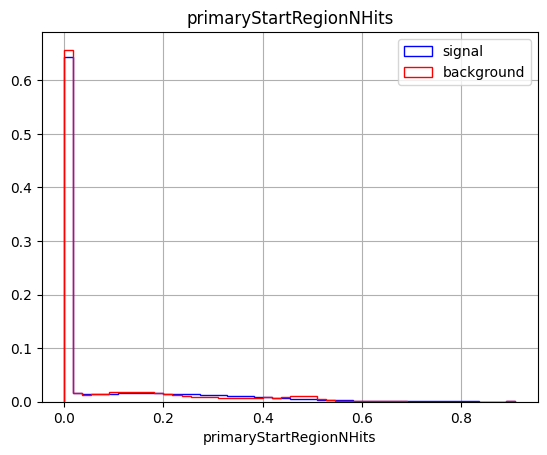

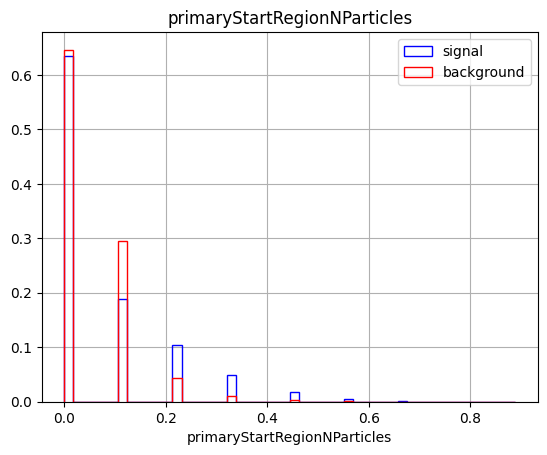

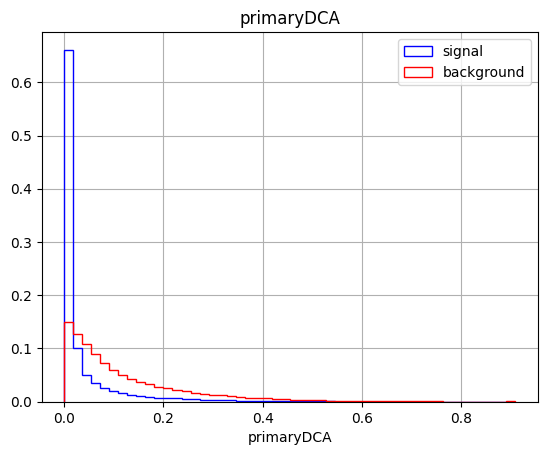

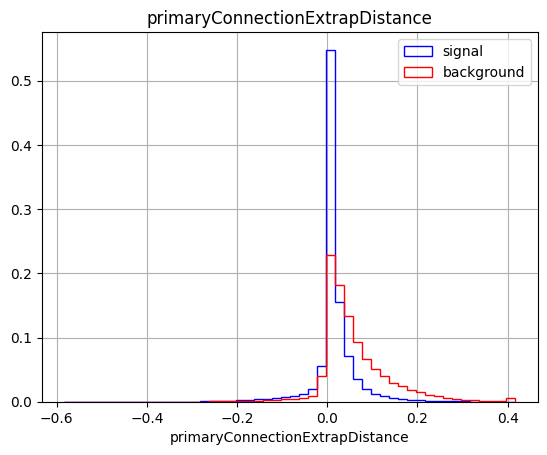

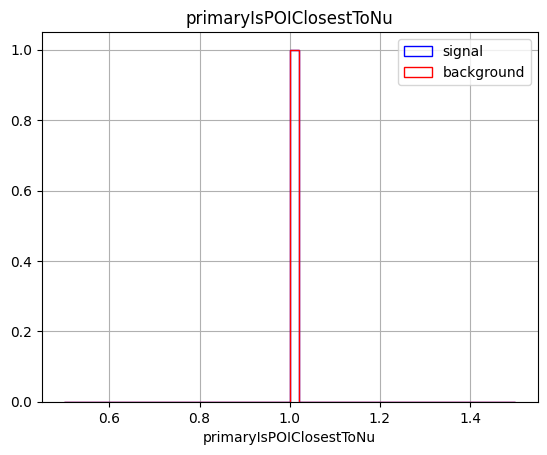

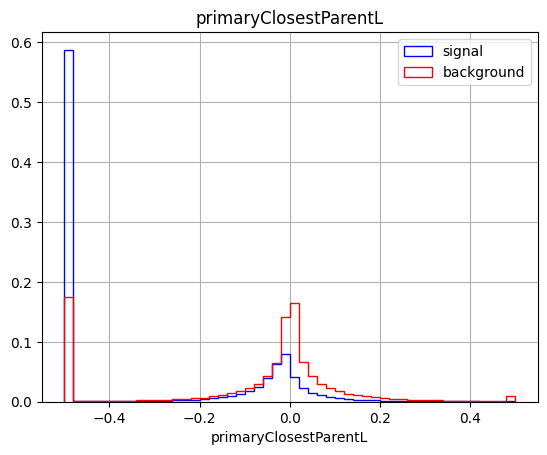

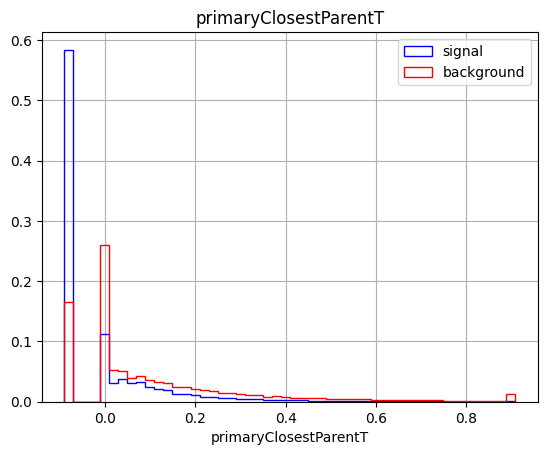

In [6]:
# 0 - primaryNSpacepoints
# 1, 9 - primaryNuVertexSeparation
# 2, 10 - primaryStartRegionNHits
# 3, 11 - primaryStartRegionNParticles
# 4, 12 - primaryDCA
# 5, 13 - primaryConnectionExtrapDistance 
# 6, 14 - primaryIsPOIClosestToNu
# 7, 15 - primaryClosestParentL
# 8, 16 - primaryClosestParentT
    
drawSignalBackground(variables[:, 0], isTruePrimaryLink, "nSpacepoints")

if (isTrackMode) :
    drawSignalBackgroundGroup_track(variables[:, 1], variables[:, 9], isLinkOrientationCorrect, isTruePrimaryLink, 'primaryNuVertexSeparation')
    drawSignalBackgroundGroup_track(variables[:, 2], variables[:, 10], isLinkOrientationCorrect, isTruePrimaryLink, 'primaryStartRegionNHits')
    drawSignalBackgroundGroup_track(variables[:, 3], variables[:, 11], isLinkOrientationCorrect, isTruePrimaryLink, 'primaryStartRegionNParticles')    
    drawSignalBackgroundGroup_track(variables[:, 4], variables[:, 12], isLinkOrientationCorrect, isTruePrimaryLink, 'primaryDCA')    
    drawSignalBackgroundGroup_track(variables[:, 5], variables[:, 13], isLinkOrientationCorrect, isTruePrimaryLink, 'primaryConnectionExtrapDistance')   
    drawSignalBackgroundGroup_track(variables[:, 6], variables[:, 14], isLinkOrientationCorrect, isTruePrimaryLink, 'primaryIsPOIClosestToNu') 
    drawSignalBackgroundGroup_track(variables[:, 7], variables[:, 15], isLinkOrientationCorrect, isTruePrimaryLink, 'primaryClosestParentL') 
    drawSignalBackgroundGroup_track(variables[:, 8], variables[:, 16], isLinkOrientationCorrect, isTruePrimaryLink, 'primaryClosestParentT') 
else :
    drawSignalBackground(variables[:, 1], isTruePrimaryLink, 'primaryNuVertexSeparation')
    drawSignalBackground(variables[:, 2], isTruePrimaryLink, 'primaryStartRegionNHits')
    drawSignalBackground(variables[:, 3], isTruePrimaryLink, 'primaryStartRegionNParticles')    
    drawSignalBackground(variables[:, 4], isTruePrimaryLink, 'primaryDCA')    
    drawSignalBackground(variables[:, 5], isTruePrimaryLink, 'primaryConnectionExtrapDistance')
    drawSignalBackground(variables[:, 6], isTruePrimaryLink, 'primaryIsPOIClosestToNu')
    drawSignalBackground(variables[:, 7], isTruePrimaryLink, 'primaryClosestParentL') 
    drawSignalBackground(variables[:, 8], isTruePrimaryLink, 'primaryClosestParentT') 

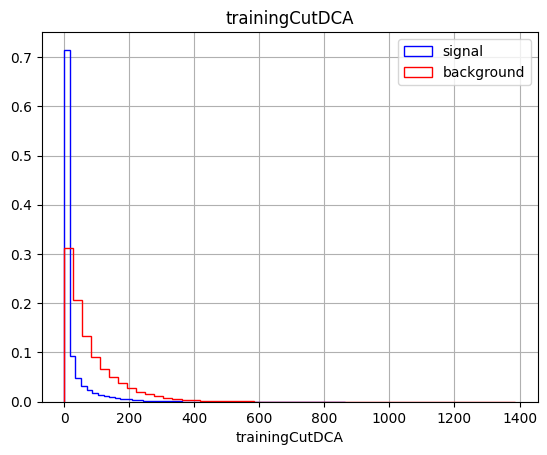

In [7]:
drawSignalBackground(np.array(trainingCutDCA), isTruePrimaryLink, "trainingCutDCA")

In [8]:
###########################################################
# This should shuffle things so that the indicies are still linked
###########################################################
variables, y, isTruePrimaryLink, trainingCutDCA = sklearn.utils.shuffle(variables, y, isTruePrimaryLink, trainingCutDCA)

In [9]:
###########################################################
# Write file
###########################################################

ntest = math.floor(nLinks * 0.1)
ntrain = math.floor(nLinks * 0.9)

print('ntest: ', ntest)
print('ntrain: ', ntrain)
    
variables_train = variables[:ntrain]
variables_test = variables[ntrain:]

y_train = y[:ntrain]
y_test = y[ntrain:]

isTruePrimaryLink_train = isTruePrimaryLink[:ntrain]
isTruePrimaryLink_test = isTruePrimaryLink[ntrain:]

trainingCutDCA_train = trainingCutDCA[:ntrain]
trainingCutDCA_test = trainingCutDCA[ntrain:]
    
np.savez(trainVarFile,
         variables_train=variables_train, y_train=y_train, isTruePrimaryLink_train=isTruePrimaryLink_train, trainingCutDCA_train=trainingCutDCA_train,
         variables_test=variables_test, y_test=y_test, isTruePrimaryLink_test=isTruePrimaryLink_test, trainingCutDCA_test=trainingCutDCA_test)

ntest:  45892
ntrain:  413033


In [10]:
print('variables_train: ', variables_train.shape)    
print('variables_test: ', variables_test.shape)  

print('y_train: ', y_train.shape)    
print('y_test: ', y_test.shape)  

print('isTruePrimaryLink_train:', isTruePrimaryLink_train.shape)
print('isTruePrimaryLink_test:', isTruePrimaryLink_test.shape)

variables_train:  (413033, 9)
variables_test:  (45893, 9)
y_train:  (413033,)
y_test:  (45893,)
isTruePrimaryLink_train: (413033,)
isTruePrimaryLink_test: (45893,)
